In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split

# cargar datos
df_partidos = pd.read_csv('./csv/data_csv.csv')
df_partidos['diferencia_goles'] = df_partidos['goles_local'] - df_partidos['goles_visitante']

# Variables predictoras
x = df_partidos[['posesion_local (%)', 'tiros_arco_local']]
y = df_partidos['diferencia_goles']

# división estándar
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print('Variables independientes - Conjunto de entrenamiento (primeros registros):')
display(x_train.head())

print('\nVariables independientes - Conjunto de prueba (primeros registros):')
display(x_test.head())


Variables independientes - Conjunto de entrenamiento (primeros registros):


,posesion_local (%),tiros_arco_local
55,51,6
88,54,9
26,53,4
42,52,4
69,60,9



Variables independientes - Conjunto de prueba (primeros registros):


,posesion_local (%),tiros_arco_local
83,47,3
53,60,3
70,50,5
45,57,7
44,45,5


In [6]:
from sklearn.linear_model import LinearRegression

# Instanciar y entrenar modelo
modelo_rl = LinearRegression()
modelo_rl.fit(x_train, y_train)

print('Modelo entrenado!!')

Modelo entrenado!!


In [7]:
print(f'Intercepto: {modelo_rl.intercept_}')
print(f'Coeficientes: {modelo_rl.coef_}')

Intercepto: -2.5257192572329763
Coeficientes: [ 0.05596278 -0.05125811]


In [8]:
# hacer Predicciones
y_pred = modelo_rl.predict(x_test)

# Comparar predicciones vs valores reales
df_resultados = x_test.copy()
df_resultados['Diferencia_Goles_Real'] = y_test
df_resultados['Diferencia_Goles_Predicha'] = y_pred.round(2)

df_resultados.head(10)

,posesion_local (%),tiros_arco_local,Diferencia_Goles_Real,Diferencia_Goles_Predicha
83,47,3,3,-0.05
53,60,3,3,0.68
70,50,5,0,0.02
45,57,7,3,0.31
44,45,5,5,-0.26
39,60,7,3,0.47
22,45,11,0,-0.57
80,49,5,1,-0.04
10,48,5,-2,-0.10
0,54,12,2,-0.12


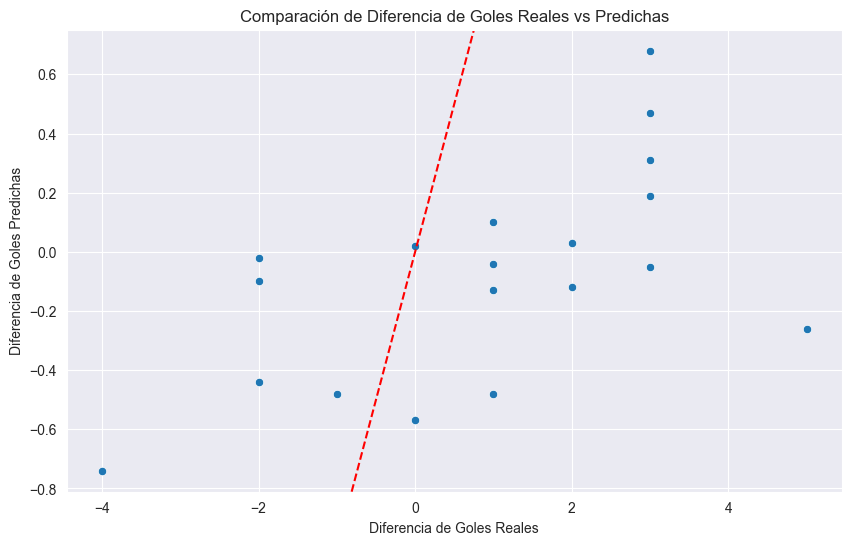

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_resultados, x='Diferencia_Goles_Real', y='Diferencia_Goles_Predicha')
plt.xlabel('Diferencia de Goles Reales')
plt.ylabel('Diferencia de Goles Predichas')
plt.title('Comparación de Diferencia de Goles Reales vs Predichas')
plt.axline((0,0), slope=1, color='red', linestyle='--')
plt.show()
